In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

%matplotlib notebook 
from astropy.io import fits
import pickle

import bz2

In [2]:
#Import the light curves
sector01_lcf = fits.open('lightcurve_1.fits')
sector02_lcf = fits.open('lightcurve_2.fits')
sector03_lcf = fits.open('lightcurve_3.fits')

In [3]:
#Check the info of one of the files
fits.info('lightcurve_1.fits')

Filename: lightcurve_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   17909R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [4]:
sector01_lcf[1].columns
#SAP_FLUX contains the aperture photometry where the relative error 
#and the sky background is already computed. 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [5]:
lcf_data = sector01_lcf[1].data
print(lcf_data)

[(2010.26554854, 0.00345538, 563621,       nan,       nan,      nan,       nan,       nan,       nan, 168, nan, nan, nan, nan,          nan,        nan,           nan,        nan,        nan,        nan)
 (2010.26693743, 0.00345539, 563622,       nan,       nan,      nan,       nan,       nan,       nan,  32, nan, nan, nan, nan,          nan,        nan,           nan,        nan,        nan,        nan)
 (2010.26832632, 0.00345539, 563623,       nan,       nan,      nan,       nan,       nan,       nan,  32, nan, nan, nan, nan,          nan,        nan,           nan,        nan,        nan,        nan)
 ...
 (2035.13486776, 0.00334134, 581527, 1543.0599, 7.267223 , 575.3901, 3.0934145, 1656.6097, 10.239748,   0, nan, nan, nan, nan, 468.22054313, 0.0027729 , 1353.04181883, 0.00281944, 0.03527247, 0.06044072)
 (2035.13625663, 0.00334132, 581528, 1541.5756, 7.2842717, 577.079 , 3.1122608, 1652.1243, 10.263769,   0, nan, nan, nan, nan, 468.21604802, 0.00277411, 1353.04604829, 0.00282587,

In [6]:
lcf_data['TIME']

array([2010.26554854, 2010.26693743, 2010.26832632, ..., 2035.13486776,
       2035.13625663, 2035.1376455 ])

In [7]:
sector01_lcf[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                17909 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [8]:
bjd_ref = lcf_data['TIME'] + sector01_lcf[1].header['BJDREFI']
print(bjd_ref)

[2459010.26554854 2459010.26693743 2459010.26832632 ... 2459035.13486776
 2459035.13625663 2459035.1376455 ]


In [9]:
#sap: simple aperture photometry
sap_flux = lcf_data['SAP_FLUX']
sap_flux_err = lcf_data['SAP_FLUX_ERR']

#pdcsap: pre-data corrected sap
pdcsap_flux = lcf_data['PDCSAP_FLUX']
pdcsap_flux_err = lcf_data['PDCSAP_FLUX_ERR']

<IPython.core.display.Javascript object>


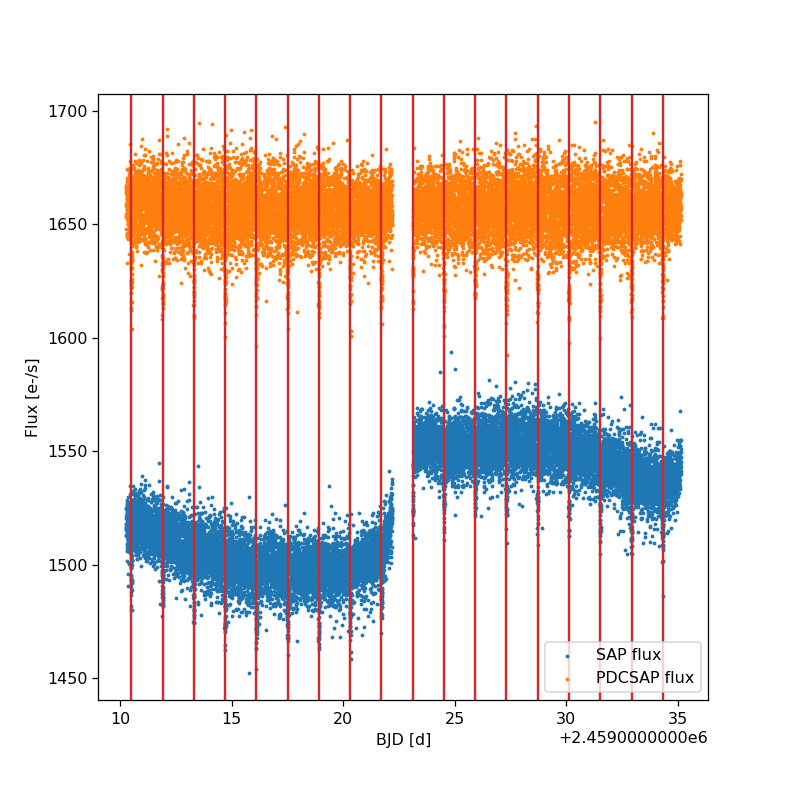

In [10]:
#Plotting the light curves
plt.figure(figsize=(6,6))
plt.scatter(bjd_ref, sap_flux, c='C0', label='SAP flux', s=2)
plt.scatter(bjd_ref, pdcsap_flux, c='C1', label='PDCSAP flux', s=2)
plt.legend()


for ii in range(-541,-523):
    plt.axvline(2459768.65359 + 1.4013777*ii, c='C3')

plt.xlabel('BJD [d]')
plt.ylabel('Flux [e-/s]')
plt.show()

In PDCSAP, the instrumental issues are already corrected. However, there might still be problems due to an imperfect correction or stellar activity.

BitMasking:
Each time the satellite goes through some problems, some blue points are removed. This can be observed in the graph of the QUALITY array above.

In [11]:
print(np.shape(sap_flux))
print(np.shape(pdcsap_flux))

(17909,)
(17909,)


<IPython.core.display.Javascript object>


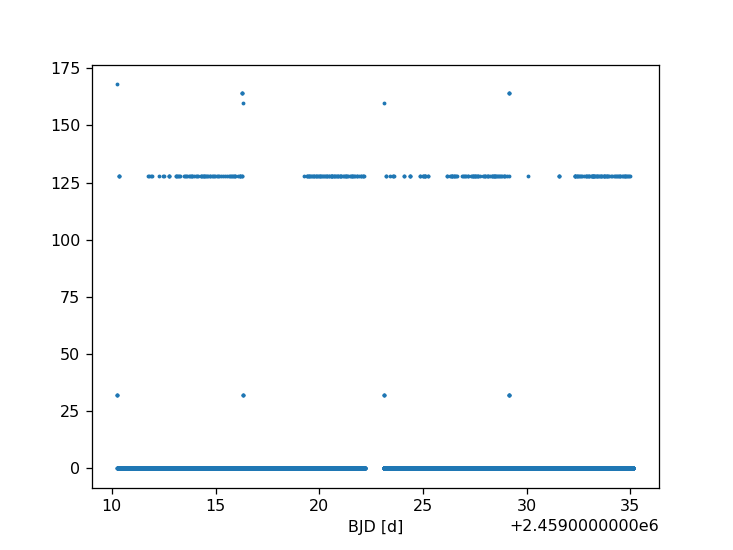

In [12]:
#Plotting the QUALITY flags over time to visualize when anomalies occurred.
plt.figure()
plt.scatter(bjd_ref, lcf_data['QUALITY'], c='C0', label='QUALITY', s=2)
plt.xlabel('BJD [d]')
plt.show()

In [13]:
#The QUALITY flag can be set equal to 0, the case where there are no errors (= no flags).
quality_selection = (lcf_data['QUALITY']==0)
np.sum(quality_selection)

16942

In [16]:
print('Number of    SAP epochs:', np.shape(sap_flux))
print('Number of PDCSAP epochs:', np.shape(pdcsap_flux))

Number of    SAP epochs: (17909,)
Number of PDCSAP epochs: (17909,)


In [17]:
quality = lcf_data['QUALITY']

#TESS QUALITY flags are stored as bitmasks. This selects which bits (representing specific anomalies) to filter:
bits_to_be_checked = np.array([1,2,3,4,5,6,8,10,12,13,15,16])
value = 0
for v in bits_to_be_checked:
    value = value + 2**(v-1)

print('Value corresponding to the active flags {0:16d}'.format(value))
print('example point                           {0:16d}'.format(quality[3]))
print()
print('binary representation of the selected flag     {0:16d}'.format(int(np.binary_repr(value))))
print('binary representation of the selected example  {0:16d}'.format(int(np.binary_repr(quality[3]))))

#Performing a bitwise check to exclude all flagged data points and those with NaNs in PDCSAP_FLUX.
bad_data = (np.bitwise_and(quality, value) >= 1) & (np.isnan(pdcsap_flux))

good_data = ~bad_data

#Selecting only points with no issues at all.
very_good_data = (lcf_data['QUALITY']==0)
#https://outerspace.stsci.edu/display/TESS/2.0+-+Data+Product+Overview

Value corresponding to the active flags            55999
example point                                         32

binary representation of the selected flag     1101101010111111
binary representation of the selected example            100000


<IPython.core.display.Javascript object>


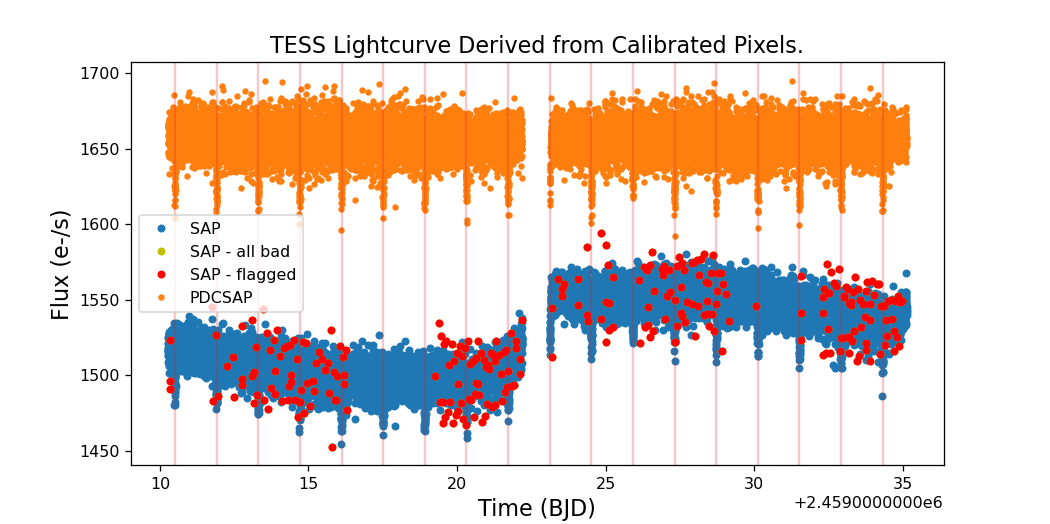

In [18]:
#Plotting clean (good_data), partially flagged, and fully flagged points in different colors for SAP and PDCSAP.

time_bjd = bjd_ref

plt.figure(figsize = (8,4))
plt.plot(time_bjd[good_data], sap_flux[good_data],'.', label = 'SAP', ms = 8)
plt.plot(time_bjd[~very_good_data], sap_flux[~very_good_data],'.', label = 'SAP - all bad', c='y', ms = 8)
plt.plot(time_bjd[bad_data], sap_flux[bad_data],'.', label = 'SAP - flagged', c='r', ms = 8)

plt.plot(time_bjd[good_data], pdcsap_flux[good_data],'.', label = 'PDCSAP', ms = 6)

for ii in range(-541,-523):
    plt.axvline(2459768.65359 + 1.4013777*ii, c='C3', alpha=0.25)

plt.legend()
plt.xlabel('Time (BJD)', fontsize = 14)
plt.ylabel('Flux (e-/s)', fontsize = 14)
plt.title("TESS Lightcurve Derived from Calibrated Pixels.", fontsize = 14)
plt.show()

plt.savefig("tess_SAP_PDCSAP.png",dpi=300)
plt.savefig("tess_SAP_PDCSAP.pdf")

In [26]:
# example for a single sector

fileout = open('target_PDCSAPflux_1.dat', 'w')

for b,v,e in zip(time_bjd[very_good_data], 
                 pdcsap_flux[very_good_data], 
                 pdcsap_flux_err[very_good_data]):
    fileout.write('{0:16f} {1:16f} {2:16f}\n'.format(b,v,e))
fileout.close()